## Please go through the notebook and answer the questions. Downloading the data might take some time so please go through the questions while waiting for the download.

In [ ]:
'''
Thanh Tran
22/06/2021
'''
from torchvision.datasets import MNIST
import torch

from torch import nn
import matplotlib.pyplot as plt

In [ ]:
#loading datasets from pytorch, we will only download the trainset to savetime
trainset = MNIST('../', download=True, train=True)


Using downloaded and verified file: ../MNIST/raw/train-images-idx3-ubyte.gz
Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw

Using downloaded and verified file: ../MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw

Using downloaded and verified file: ../MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw

Failed to download (trying next):
HTTP Error 524: Origin Time-out




Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


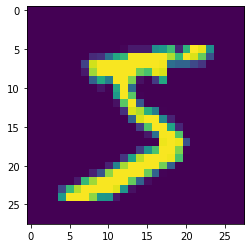

In [ ]:
# Show this sample as an image.
plt.imshow(trainset.data[0])

In [ ]:
# Show the shape of this image.
trainset.data[0].shape

torch.Size([28, 28])

In [ ]:
# Get labels for train and test set
y_train = trainset.targets


## Q1: Display the shape of the training set

In [ ]:
# Show the shape of train and test set
# 60 000 images for training, 10 000 for testing

trainset.data.??

In [ ]:
# Reshape all the pixels for an image in a single row 
train = trainset.data.reshape(60000, -1)



In [ ]:
# Convert data to float32 torch tensors (float works better with Pytorch)
train = train.to(torch.float32)


### Normalise data

In [ ]:
# The data isn't normalized
# use the tensor method in the 3.1 notebook to print the mean and 
# standard deviation of the data
m, std = train.mean(), train.std()
train = (train - m) / std

print(train.mean(), train.std()) 

tensor(1.8892e-08) tensor(1.)


## Q2: Please enter the right parameters to define the model with a linear layer of 30 units, then RELU, then another linear layer

In [ ]:
# Build a model with a linear layer of 30 units, then RELU, then another linear layer


model = nn.Sequential(
    nn.Linear(??,??), 
    nn.ReLU(), 
    nn.Linear(??,??) 
)

## Q4: What is the shape of your output?

In [ ]:
# input your train data into your model to get predictions...
output = model(train)

# find the shape of your output ?
??

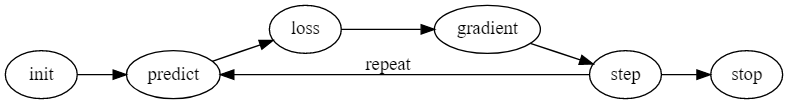

In [ ]:
# Using cross entropy from pytorch
output = model(train)
F = nn.CrossEntropyLoss() #F.cross_entropy(output, y_train)
loss = F(output, y_train)

tensor(2.3659, grad_fn=<NllLossBackward>)

## Q4: Find the number of weights (i.e: parameters of your model)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
